# Power Crisis in South Africa
## Load-shedding
South Africa experiences regular power cuts or loadshedding as a result of aging coal fired power stations. Are Renewable power sources the answer?

Analysing DataSet from Eskom and EskomSEPush

## Loading all the libraries

In [1]:
library("readr")
library("tidyverse")
library("skimr")
library("dplyr")
library("janitor") 
library("lubridate")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ dplyr   1.0.9
✔ tibble  3.1.7     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Loading Datasets

In [2]:
ESK2033 <- read_csv("../input/sa-electricity-historical-data/ESK2033.csv")
EskomSePush_history <- read_csv("../input/sa-electricity-historical-data/EskomSePush_history.csv")

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 43824 Columns: 42
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Date Time Hour Beginning, Non Comm Sentout, Ingula Gen Unit Hours
dbl (39): Original Res Forecast before Lockdown, Residual Forecast, RSA Cont...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 670 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): created_at
dbl (1): stage

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Checking DataSet
### ESK2033
* Date Time loaded as strings
* Ingula gen unit hours loaded as strings
* There are also Null values. It simply means no record was made at that time.


In [3]:
glimpse(ESK2033)

Rows: 43,824
Columns: 42
$ `Date Time Hour Beginning`              <chr> "2018-04-01 12:00:00 AM", "201…
$ `Original Res Forecast before Lockdown` <dbl> NA, NA, NA, NA, NA, NA, NA, NA…
$ `Residual Forecast`                     <dbl> 19904.97, 19553.90, 19314.28, …
$ `RSA Contracted Forecast`               <dbl> 20367.07, 19988.73, 19731.24, …
$ `Dispatchable Generation`               <dbl> 20237, 19744, 19631, 19731, 19…
$ `Residual Demand`                       <dbl> 20237.0, 19744.0, 19631.0, 197…
$ `RSA Contracted Demand`                 <dbl> 20722.06, 20188.49, 20019.60, …
$ `International Exports`                 <dbl> 1215.902, 1203.474, 1177.571, …
$ `International Imports`                 <dbl> 1120, 1106, 1117, 1118, 1108, …
$ `Thermal Generation`                    <dbl> 19444, 19297, 19165, 19279, 19…
$ `Nuclear Generation`                    <dbl> 931, 930, 931, 930, 930, 931, …
$ `Eskom Gas Generation`                  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ `Eskom OCGT G

In [4]:
#Another way of checking the structure
str(ESK2033)

spec_tbl_df [43,824 × 42] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date Time Hour Beginning             : chr [1:43824] "2018-04-01 12:00:00 AM" "2018-04-01 01:00:00 AM" "2018-04-01 02:00:00 AM" "2018-04-01 03:00:00 AM" ...
 $ Original Res Forecast before Lockdown: num [1:43824] NA NA NA NA NA NA NA NA NA NA ...
 $ Residual Forecast                    : num [1:43824] 19905 19554 19314 19343 19539 ...
 $ RSA Contracted Forecast              : num [1:43824] 20367 19989 19731 19754 19988 ...
 $ Dispatchable Generation              : num [1:43824] 20237 19744 19631 19731 19890 ...
 $ Residual Demand                      : num [1:43824] 20237 19744 19631 19731 19890 ...
 $ RSA Contracted Demand                : num [1:43824] 20722 20188 20020 20079 20237 ...
 $ International Exports                : num [1:43824] 1216 1203 1178 1184 1197 ...
 $ International Imports                : num [1:43824] 1120 1106 1117 1118 1108 ...
 $ Thermal Generation                   : num [1:43824] 19444 19

## Cleaning Dataset 1
I created two new functions. 

In [5]:
#New function
power <- ESK2033 %>% 
  separate('Date Time Hour Beginning', into = c('date', 'time'), sep='\\s',
           extra='merge') %>% 
  clean_names() 

#Formated date and time from 12hr format to 24hr format
power_2 <- ESK2033 %>% 
  mutate(formated_date_time = as.POSIXct(ESK2033$"Date Time Hour Beginning", format = '%Y-%m-%d %I:%M:%S %p')) %>% 
  clean_names() 

## Checking Dataset
### EskomSEPush
Date time not formated correctly

In [6]:
glimpse(EskomSePush_history)

Rows: 670
Columns: 2
$ created_at <chr> "2022-08-18 23:42:45", "2022-08-18 16:00:29", "2022-08-18 0…
$ stage      <dbl> 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 4, 2, 0, 2, 0, 1, 0, 2,…


In [7]:
str(EskomSePush_history)

spec_tbl_df [670 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ created_at: chr [1:670] "2022-08-18 23:42:45" "2022-08-18 16:00:29" "2022-08-18 0:02:50" "2022-08-17 16:00:41" ...
 $ stage     : num [1:670] 0 2 0 2 0 2 0 0 2 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   created_at = col_character(),
  ..   stage = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


## Cleaning Dataset 2
I created a new function 'push' where by I added a new column with correctly formated date-time.
I also filtered for data when there was load shedding

In [8]:
push <- EskomSePush_history %>% 
  mutate(date_time = as.POSIXct(EskomSePush_history$created_at, format = '%Y-%m-%d %H:%M:%S'))%>% 
  filter(stage>0) %>% 
  select(date_time, stage) %>% 
  arrange(-stage, date_time)

head(push)

date_time,stage
<dttm>,<dbl>
2019-12-09 18:06:17,6
2022-06-28 16:01:40,6
2022-06-29 16:02:14,6
2022-06-30 14:03:13,6
2022-07-04 16:00:31,6
2022-07-05 15:58:00,5


# Analysing Data
## The number of days loadshedding has been experienced

In [9]:
days_load_shed <- power_2 %>%
    filter(manual_load_reduction_mlr>0) %>%
    count(year=year(formated_date_time)) %>%
    summarise(year, days_of_loadshedding = round(n/24,1))

head(days_load_shed)

year,days_of_loadshedding
<dbl>,<dbl>
2018,6.8
2019,22.7
2020,36.3
2021,48.5
2022,52.1


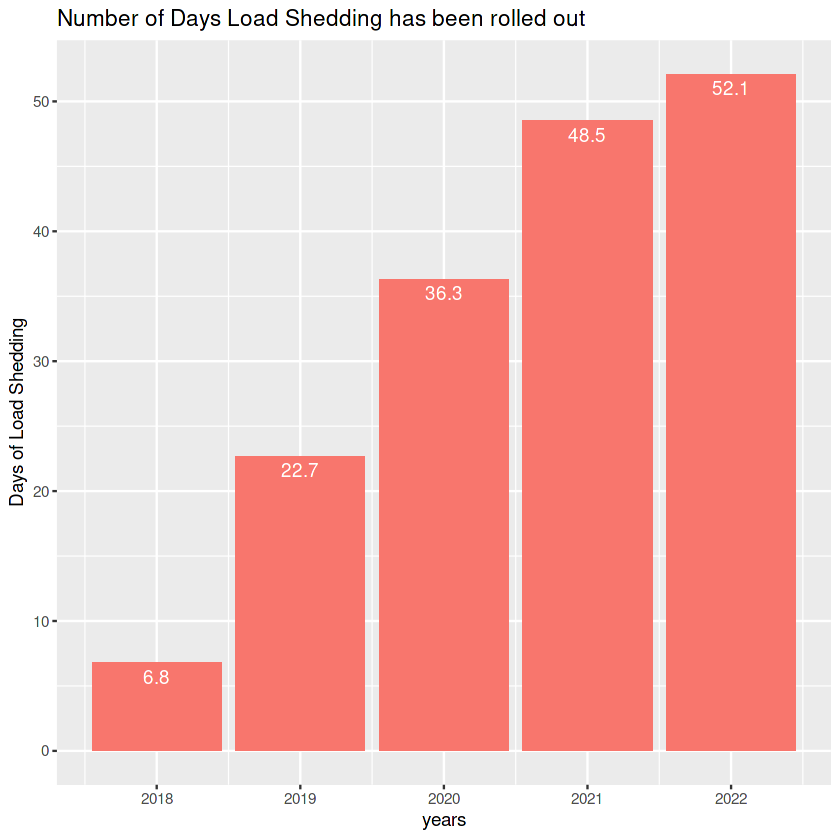

In [10]:
ggplot(days_load_shed, mapping = aes(x=year, y =days_of_loadshedding, fill="darkred")) + geom_col() +
    geom_text(aes(label=days_of_loadshedding), vjust=1.5, colour ="white") + theme(legend.position="none")+
    labs(title="Number of Days Load Shedding has been rolled out", x = "years", y="Days of Load Shedding")

South Africa has experenced more than 50 days of power cuts, which is the highest compared to the other years. The data is up until 2022-07-19 which means this number is still about to get worse.
This translates to a total of 2475 GWh of energy load shed (refer to the graph below)

In [11]:
energy_shed <- power_2 %>% 
  filter(manual_load_reduction_mlr>0) %>%
  group_by(year=year(formated_date_time)) %>% 
  summarise(total_energy_loadshed_GWh=round(sum(manual_load_reduction_mlr)/1000,1))

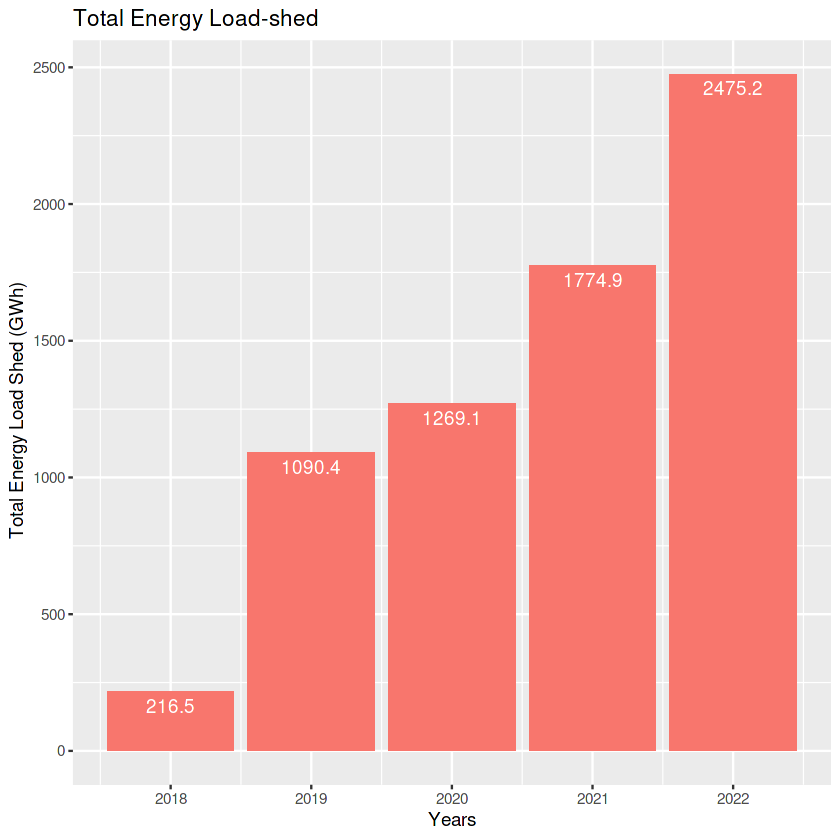

In [12]:
ggplot(energy_shed, mapping = aes(x=year, y=total_energy_loadshed_GWh, fill="darkred")) + geom_col() +
geom_text(aes(label=total_energy_loadshed_GWh), vjust=1.5, colour ="white") + theme(legend.position="none")+
    labs(title="Total Energy Load-shed", x="Years", y=" Total Energy Load Shed (GWh)")

The graphs below shows the frequecny of different stages for each of the past 5 years. The highest stage, namely stage 6, which requires 6 000 MW of power to be load shed was rolled out this year. The last time stage 6 was rolled out is 09 December 2019

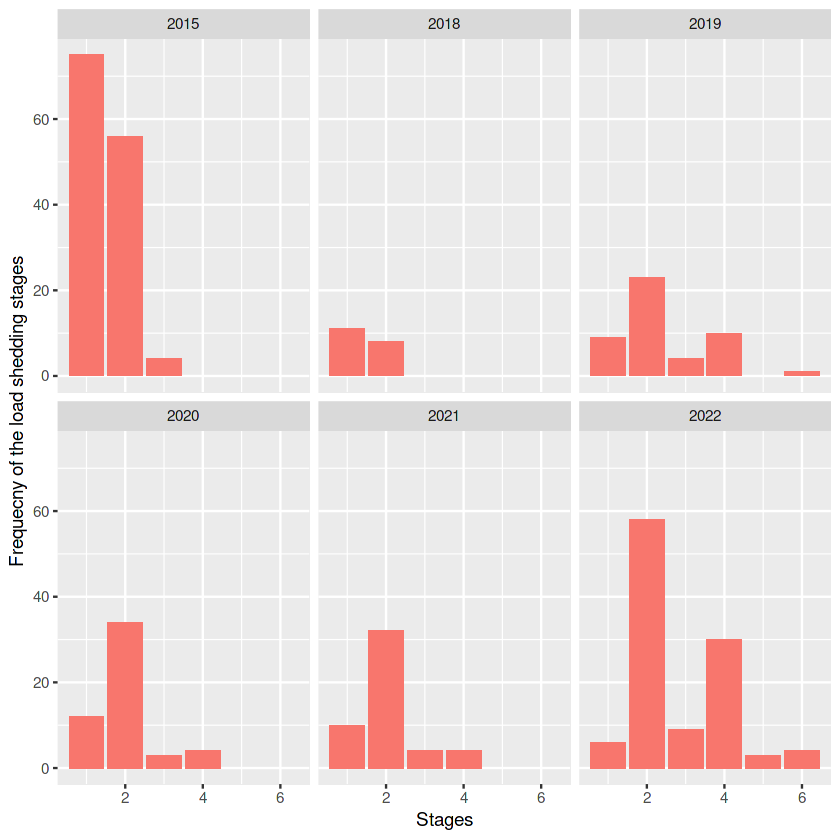

In [13]:
ggplot(data = push) +geom_bar(mapping = aes(x=stage, fill="dark red")) + facet_wrap(~year(date_time)) +
labs(y="Frequecny of the load shedding stages", x="Stages")+theme(legend.position="none")


#### Energy Mix

In [14]:
energy_2 <- power_2 %>% 
  group_by(year=year(formated_date_time)) %>% 
  
  summarise(avail_gen = mean(dispatchable_generation), rsa_demand = mean(rsa_contracted_demand),
            coal_sta=mean(thermal_generation), 
            imports = mean(international_imports), nuclear_power = mean(nuclear_generation),
            open_cycle_gas=mean(eskom_ocgt_generation), pumped_water =mean(pumped_water_generation),
            ipp_ocgt_contr = mean(dispatchable_ipp_ocgt),
            hydro_gen=mean(hydro_water_generation), 
            total_ren=mean(total_re)) %>% 
  drop_na() 

pie_data_frame <- as.data.frame(energy_2[4,4:11], drop=false)

lbls <- c("Coal Station", "Imports", "Nuclear Power", "Open Cycle Gas Turbine",
         "Pumped Water","IPP OCGT", "Hydro water", "Renewable Energy")


slices = c(pie_data_frame$coal_sta,
           pie_data_frame$imports,
           pie_data_frame$nuclear_power,
           pie_data_frame$open_cycle_gas,
           pie_data_frame$pumped_water,
           pie_data_frame$ipp_ocgt_contr,
           pie_data_frame$hydro_gen,
           pie_data_frame$total_ren)

pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct)
lbls <- paste(lbls,"%",sep=" ")
pie_data <- data.frame(
          power_sources = lbls,
          values = slices)


About 80% of electricity is generated by coal fired power stations and only about 7% is from renewable energy sources, mainly Wind generation, Solar power, Photovoltaic generation and other smaller contracted renewables such as hydro, biomas, landfills etc

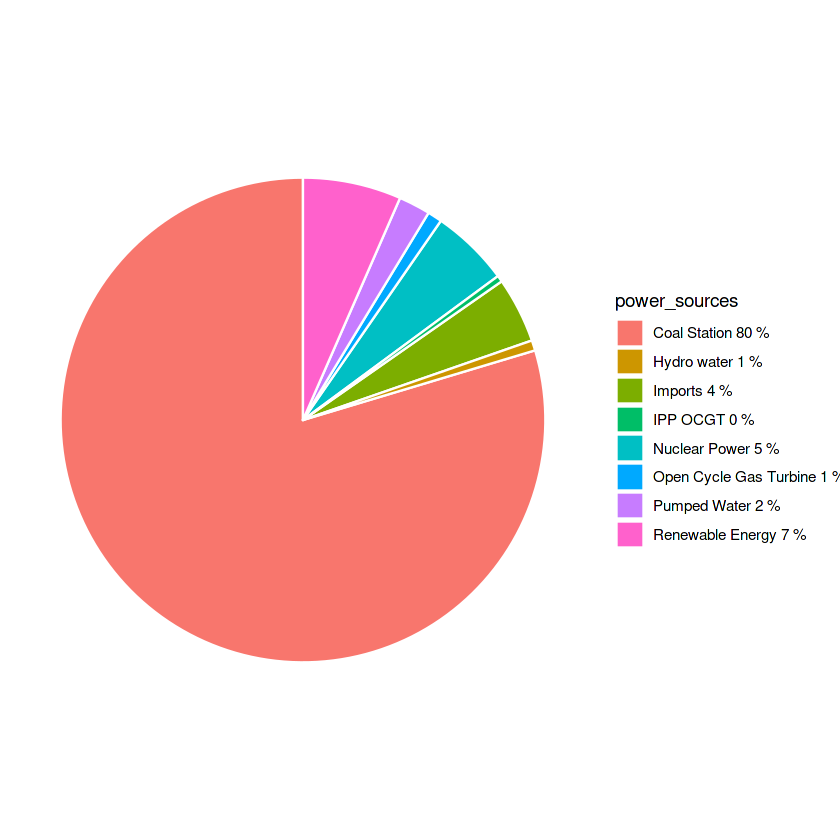

In [15]:
ggplot(data=pie_data, aes(x="", y=values, fill = power_sources)) + geom_bar(stat='identity', width=1, color ='white')+
      coord_polar("y", start=0) + theme_void() 

#### Renewable Energy Sources (RE)


In [16]:
re_cap <- power_2 %>% 
  group_by(year=year(formated_date_time)) %>% 
  summarise(wind_capacity = mean(wind_installed_capacity),
            Contr_solar_capacity = mean(csp_installed_capacity),
            pv_capacity = mean(pv_installed_capacity),
            contr_re_capacity = mean(other_re_installed_capacity),
            total_re = mean(total_re_installed_capacity)) %>% 
  drop_na()

ren_data_frame <- as.data.frame(re_cap)

plt_data <- data.frame(re_sources=c(rep("Wind Capacity",4), rep("Solar Capacity",4), rep("PV Capacity",4),rep("Contr RE Capacity",4)),
                       values=c(ren_data_frame$wind_capacity,
                                ren_data_frame$Contr_solar_capacity,
                                ren_data_frame$pv_capacity,
                                ren_data_frame$contr_re_capacity),
                       year=ren_data_frame[,1])

Eskom has been slowly increasing RE capacity especially the two main renewable energy sources namely, Wind power and PV (Photovoltaic generation) capacity.

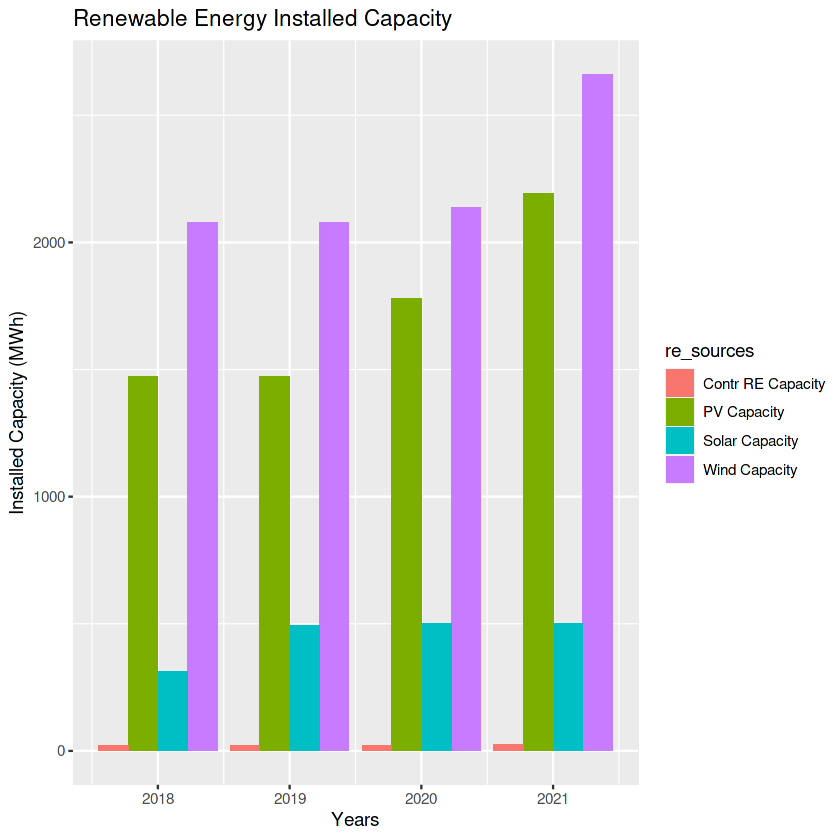

In [17]:
ggplot(data=plt_data, aes(x=year, y=values, fill=re_sources)) + 
  geom_bar(stat='identity', position ="dodge") + 
labs(x="Years", y="Installed Capacity (MWh)", title="Renewable Energy Installed Capacity")

In [18]:
renew2 <- power_2 %>% 
  group_by(date= year(formated_date_time),time = format(as.POSIXct(power_2$formated_date_time), format ="%H:%M:%S")) %>% 
  filter(date=='2021') %>% 
  summarise(pv=mean(pv), wind_power=mean(wind), contr_solar=mean(csp),
            contr_re = mean(other_re),demand = mean(rsa_contracted_demand),
            load_reduction = mean(manual_load_reduction_mlr),
            hydro_gen=mean(hydro_water_generation), pumped_water = mean(pumped_water_generation)) %>% 
  arrange(time)

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


Wind Power is stable throughout the day and is the highest in summer months. PV is only available when the sun is out, normally from 6:00 to 18:00. However, the excess power during off peak hours can be use to pump water for hydro powered stations which can be used to supplement power during peak hours.

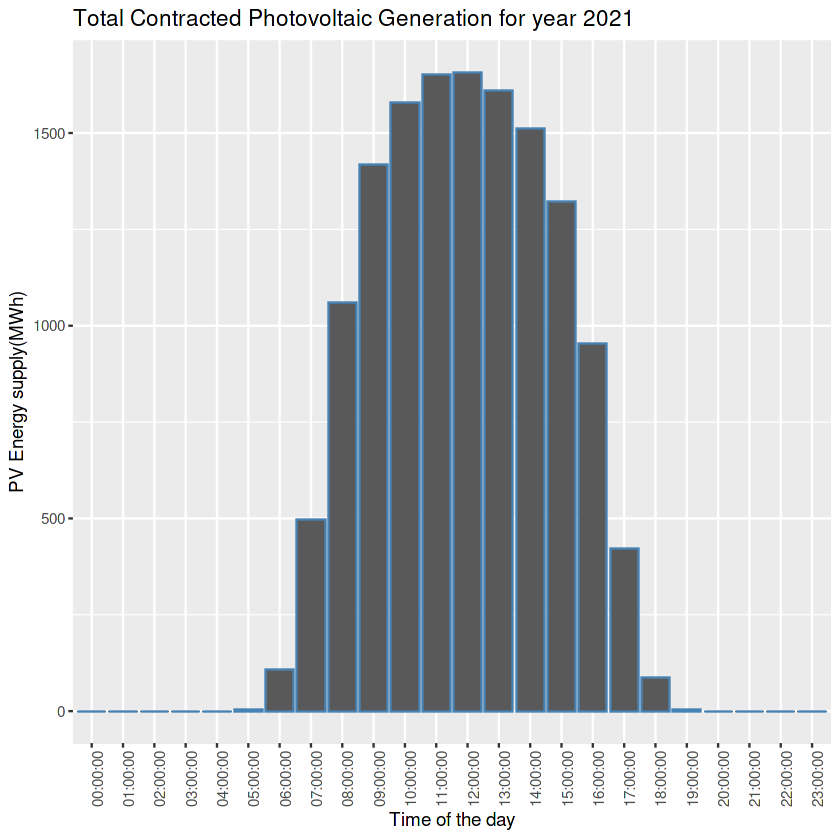

In [19]:
ggplot(data=renew2, mapping = aes(x=time))+ #+geom_col(mapping = aes(y=wind_power), color="darkred")#+
  geom_col(mapping = aes(y=pv), color="steelblue") +
  theme(axis.text.x=element_text(angle=90)) + 
labs(x="Time of the day", y="PV Energy supply(MWh)", title="Total Contracted Photovoltaic Generation for year 2021")

## Conclusion
South Africa power supply is constrained and there is no quick solution to solving it. Coal powerd stations are aging and are prone to frequent break downs. Newer power stations also do breakdown from time to time due to poor quality in construction. 
Renewable energy power stations are reliable, however the capacity is not enough to compensate for failing base load power stations.